# Maternal Health Risk Analysis

In [115]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
#import the data
df = pd.read_csv("Maternal_Risk.csv")
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
803,24,120,80,7.5,98.0,66,low risk
804,16,100,70,7.5,98.0,80,low risk
805,19,120,76,7.5,98.0,66,low risk
806,40,160,100,19.0,98.0,77,high risk


## Data preparation and cleaning

In [117]:
# check for missing data
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [118]:
df.isna().any()

Age            False
SystolicBP     False
DiastolicBP    False
BS             False
BodyTemp       False
HeartRate      False
RiskLevel      False
dtype: bool

In [119]:
# Check for duplicates
duplicates = df.duplicated().any()
duplicates

True

In [120]:
# Drop duplicates
df = df.drop_duplicates()

In [121]:
# Check for duplicates
duplicates = df.duplicated().any()
duplicates

False

In [122]:
df['RiskLevel'].unique()

array(['high risk', 'low risk'], dtype=object)

## Exploratory Analysis

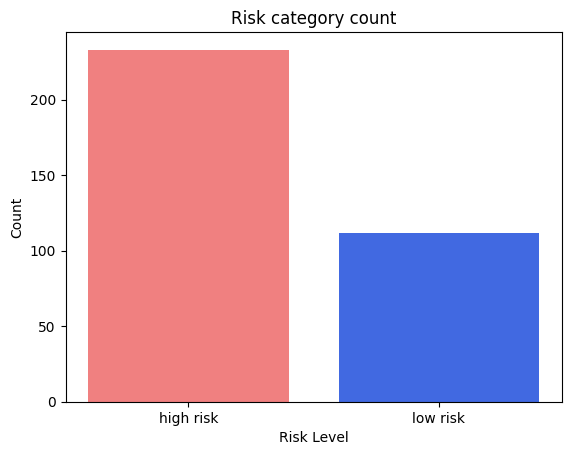

In [123]:
#Plot the risk Category count
plt.bar(df['RiskLevel'].unique() , df['RiskLevel'].value_counts(), color=['lightcoral', 'royalblue'])
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Risk category count')
plt.show()

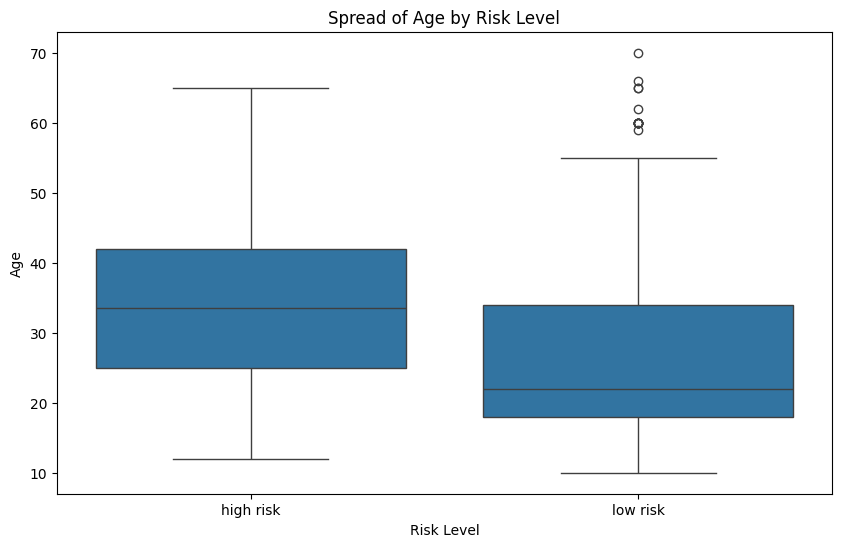

In [124]:
# Spread of age by risk level
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='Age', data=df)
plt.title('Spread of Age by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.show()

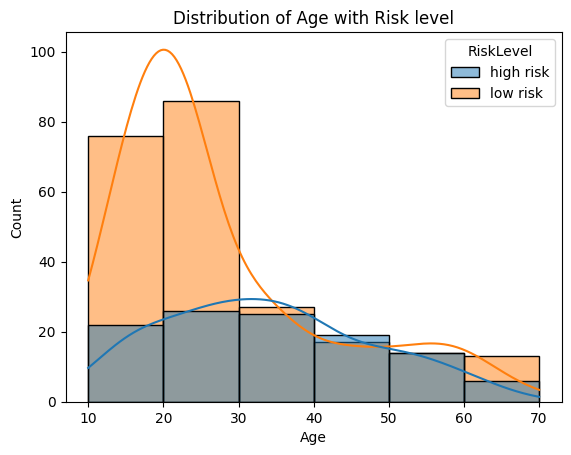

In [125]:
# Distribution of Age with Risk level
sns.histplot(data=df, x='Age', hue='RiskLevel', kde=True , bins = 6)
plt.title('Distribution of Age with Risk level')
plt.show()

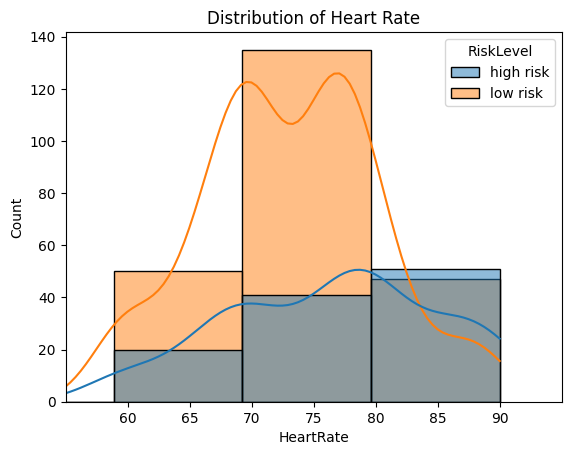

In [126]:
#Distribution of Heart Rate with risk level
sns.histplot(data=df, x='HeartRate', hue='RiskLevel', kde=True , bins = 8)
plt.title('Distribution of Heart Rate')
plt.xticks([i for i in range(60, 91, 5)])
plt.xlim(55, 95)
plt.show()

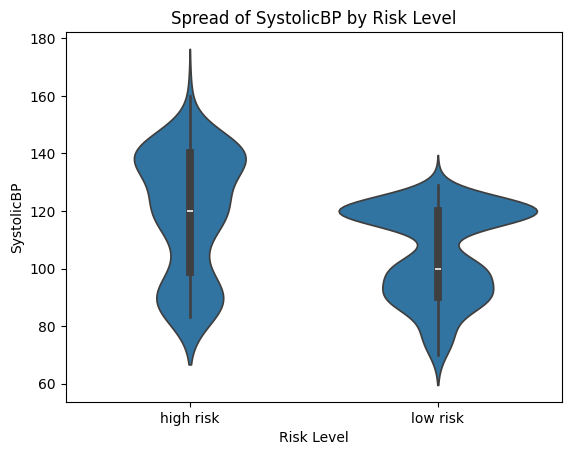

In [127]:
# Spread of SystolicBP by Risk Level
sns.violinplot(x="RiskLevel", y="SystolicBP", data=df)
plt.xlabel('Risk Level')
plt.ylabel('SystolicBP')
plt.title('Spread of SystolicBP by Risk Level')
plt.show()

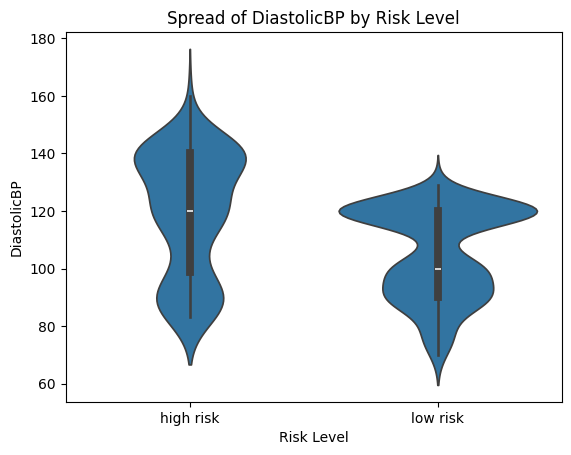

In [128]:
# Spread of DiastolicBP by Risk Level
sns.violinplot(x="RiskLevel", y="SystolicBP", data=df)
plt.xlabel('Risk Level')
plt.ylabel('DiastolicBP')
plt.title('Spread of DiastolicBP by Risk Level')
plt.show()

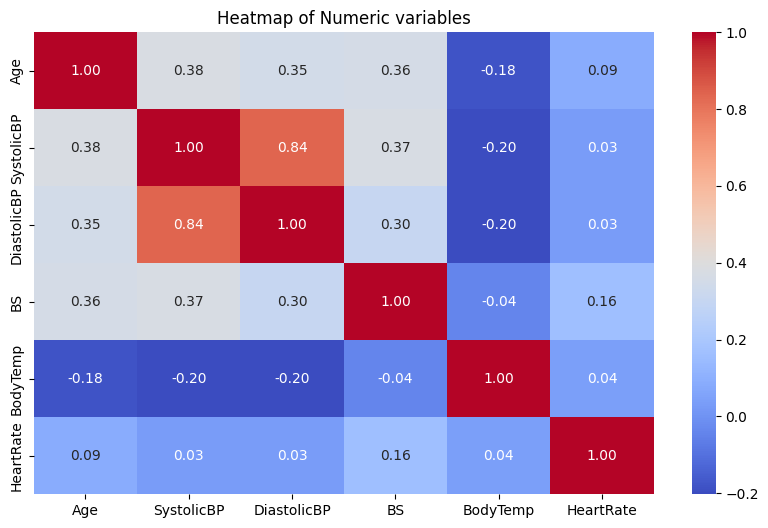

In [129]:
# Correlation analysis of numeric variables
import matplotlib.pyplot as plt
dfm = df[['Age', 'SystolicBP', 'DiastolicBP',	'BS',	'BodyTemp',	'HeartRate']]

# Calculate the correlation matrix
corr_matrix = dfm.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap of Numeric variables')
plt.show()

# Classification Models

In [130]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


df['RiskLevel'] = df['RiskLevel'].map({'low risk': 0, 'high risk': 1})



# Define features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Classification Report:\n", classification_report(y_test, log_reg_pred))

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
rf_pred = rf_classifier.predict(X_test_scaled)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


Logistic Regression:
Accuracy: 0.8405797101449275
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88        41
           1       0.95      0.64      0.77        28

    accuracy                           0.84        69
   macro avg       0.87      0.81      0.82        69
weighted avg       0.86      0.84      0.83        69


Random Forest Classifier:
Accuracy: 0.8985507246376812
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.89      0.86      0.87        28

    accuracy                           0.90        69
   macro avg       0.90      0.89      0.89        69
weighted avg       0.90      0.90      0.90        69



<ipython-input-130-48eea2970ec9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RiskLevel'] = df['RiskLevel'].map({'low risk': 0, 'high risk': 1})


## Model accuracy comparison

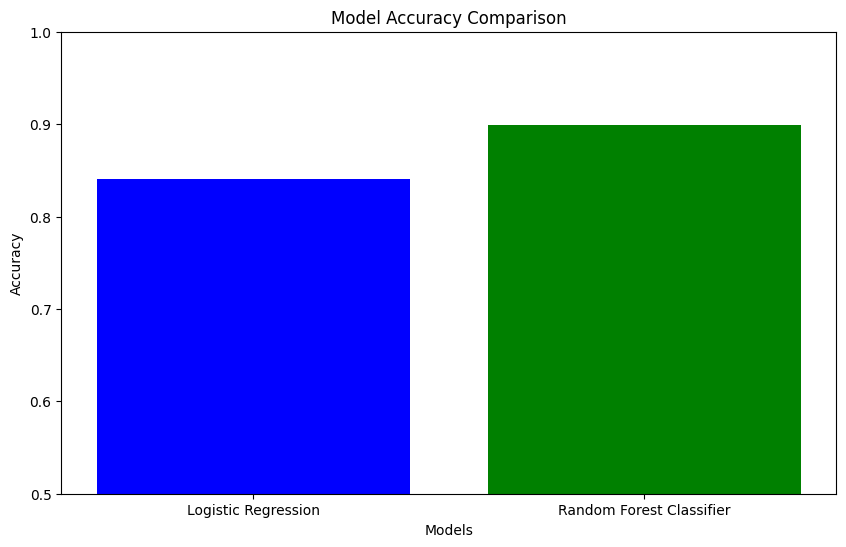

In [131]:
import matplotlib.pyplot as plt

# Plot model accuracy comparison
models = ['Logistic Regression', 'Random Forest Classifier']
accuracy = [accuracy_score(y_test, log_reg_pred), accuracy_score(y_test, rf_pred)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.5, 1)
plt.show()
